<a href="https://colab.research.google.com/github/Suryaa1309/Mobile-Price-prediction/blob/main/MObile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [ ]:
ds=pd.read_csv("/content/drive/MyDrive/Mobile price prediction/data_mobile_price_range.csv")

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
ds.describe(include="all")

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [ ]:
ds.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [63]:
len(ds[ds.duplicated()])

0

In [ ]:
ds.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
ds=ds.rename(columns={"battery_power":"Battery_Power","blue":"Bluetooth","clock_speed":"Clock_Speed","dual_sim":"Dual_sim","fc":"Front_camera","four_g":"4G","int_memory":"Internal_memory","m_dep":"Mobile_depth","mobile_wt":"MObile_weight","n_cores":"NO_of_Cores","pc":"Primary_camera","px_height":"Pixel_Height","px_width":"Pixel_width","ram":"Ram","sc_h":"Screen_height","sc_w":"Screen_width","talk_time":"Talk_Time","three_g":"3G","touch_screen":"Touch_screen","wifi":"WIFI","price_range":"Price_Range"})

In [ ]:
ds.head()

Battery_Power  Bluetooth  Clock_Speed  Dual_sim  Front_camera  4G  \
0            842          0          2.2         0             1   0   
1           1021          1          0.5         1             0   1   
2            563          1          0.5         1             2   1   
3            615          1          2.5         0             0   0   
4           1821          1          1.2         0            13   1   

   Internal_memory  Mobile_depth  MObile_weight  NO_of_Cores  ...  \
0                7           0.6            188            2  ...   
1               53           0.7            136            3  ...   
2               41           0.9            145            5  ...   
3               10           0.8            131            6  ...   
4               44           0.6            141            2  ...   

   Pixel_Height  Pixel_width   Ram  Screen_height  Screen_width  Talk_Time  \
0            20          756  2549              9             7         19   
1           905         1988  2631             17             3          7   
2          1263         1716  2603             11             2          9   
3          1216         1786  2769             16             8         11   
4          1208         1212  1411              8             2         15   

   3G  Touch_screen  WIFI  Price_Range  
0   0             0     1            1  
1   1             1     0            2  
2   1             1     0            2  
3   1             0     0            2  
4   1             1     0            1  

[5 rows x 21 columns]

In [ ]:
sns.pairplot(ds,hue='Price_Range')


In [ ]:
ds.shape

(2000, 21)

In [ ]:
ds['Price_Range'].value_counts()

1    500
2    500
3    500
0    500
Name: Price_Range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


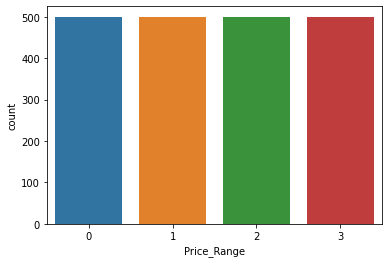

In [ ]:
sns.countplot(ds["Price_Range"])

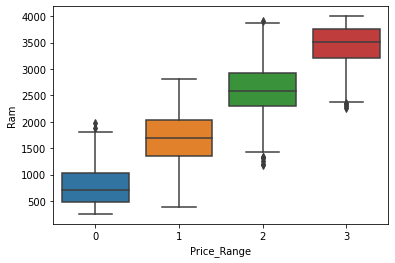

In [ ]:
sns.boxplot(y="Ram", x="Price_Range", data=ds)

In [ ]:
sns.boxplot(y="Internal_memory", x="Price_Range", data=ds)

In [ ]:
sns.boxplot(x="Price_Range", y="Battery_Power", data=ds)

In [ ]:
ds["3G"].value_counts()

1    1523
0     477
Name: 3G, dtype: int64

In [ ]:
sns.countplot(ds["3G"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


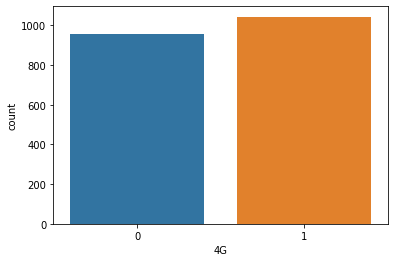

In [ ]:
sns.countplot(ds["4G"])

In [ ]:
ds["4G"].value_counts()

1    1043
0     957
Name: 4G, dtype: int64

Text(0.5, 0, 'MegaPixels')

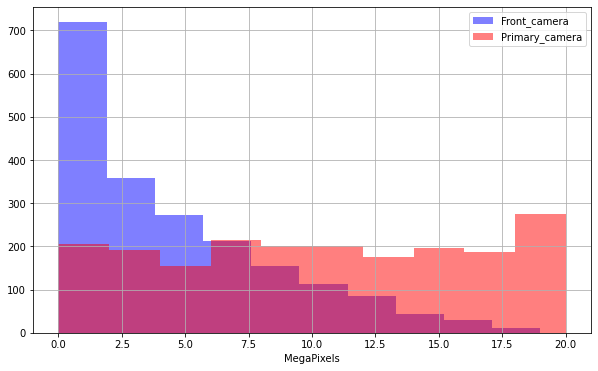

In [ ]:
plt.figure(figsize=(10,6))
ds['Front_camera'].hist(alpha=0.5,color='blue',label='Front_camera')
ds['Primary_camera'].hist(alpha=0.5,color='red',label='Primary_camera')
plt.legend()
plt.xlabel('MegaPixels')

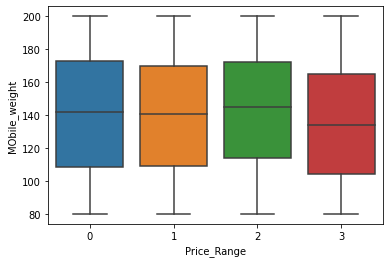

In [ ]:
sns.boxplot(x="Price_Range", y="MObile_weight", data=ds)

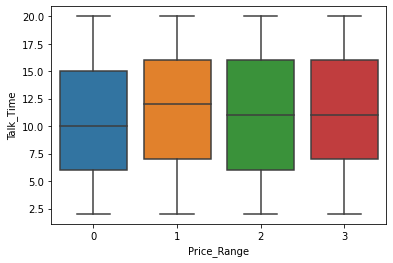

In [ ]:
sns.boxplot(y="Talk_Time", x="Price_Range", data=ds)

In [ ]:
X=ds.drop("Price_Range",axis=1)

In [ ]:
y=ds["Price_Range"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
X.shape

(2000, 20)

In [ ]:
y.shape

(2000,)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=10)

In [50]:
test_knn=knn.score(X_test,y_test)
print("Test accuracy :",test_knn)

Test accuracy : 0.9212121212121213


In [52]:
train_knn=knn.score(X_train,y_train)
print("Train accuracy :",train_knn)

Train accuracy : 0.9462686567164179


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,  random_state=None,
            splitter='best')

DecisionTreeClassifier()

In [47]:
test_dtree=dtree.score(X_test,y_test)
print("Test accuracy ",test_dtree)

Test accuracy  0.8287878787878787


In [48]:
train_dtree=dtree.score(X_train,y_train)
print("Train accuracy",train_dtree)

Train accuracy 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [58]:
random_test=rfc.score(X_test,y_test)
print("Test accuracy :",random_test)

Test accuracy : 0.8651515151515151


In [59]:
random_train=rfc.score(X_train,y_train)
print("Train accuracy :",random_train)

Train accuracy : 1.0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = knn.predict(X_test)

In [ ]:
#KNN
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
           1       0.87      0.94      0.91       152
           2       0.92      0.85      0.88       199
           3       0.93      0.92      0.93       151

    accuracy                           0.92       660
   macro avg       0.92      0.93      0.92       660
weighted avg       0.92      0.92      0.92       660



In [ ]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[157   1   0   0]
 [  6 143   3   0]
 [  0  20 169  10]
 [  0   0  12 139]]


In [41]:
#decision tree report 
prd1=dtree.predict(X_test)

In [42]:
print(classification_report(y_test,prd1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       158
           1       0.75      0.75      0.75       152
           2       0.84      0.77      0.80       199
           3       0.83      0.92      0.87       151

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



In [43]:
matrix=confusion_matrix(y_test,prd1)
print(matrix)

[[140  18   0   0]
 [ 18 114  18   2]
 [  0  19 154  26]
 [  0   0  12 139]]


In [55]:
#Random Forest 
random=rfc.predict(X_test)
print(classification_report(y_test,random))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       158
           1       0.79      0.87      0.82       152
           2       0.90      0.76      0.82       199
           3       0.87      0.92      0.89       151

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.86       660



In [56]:
matrix=confusion_matrix(y_test,random)
print(matrix)

[[149   9   0   0]
 [ 15 132   5   0]
 [  0  27 151  21]
 [  0   0  12 139]]
